In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2012-01-01'
end = '2022-11-30'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519279
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586558
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726295
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859332
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838939


In [3]:
start = '2020-01-01'
end = '2022-11-30'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920570
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.561531
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.846359
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.426819
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.081512


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-23,151.830002,149.339996,149.449997,151.070007,58301400.0,151.070007
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111224400.0,148.029999


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920570
1,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.561531
2,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.846359
3,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.426819
4,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.081512


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,73.419998,72.379997,72.482498,73.412498,100805600.0
1,75.150002,73.797501,74.059998,75.087502,135480400.0
2,75.144997,74.125000,74.287498,74.357498,146322800.0
3,74.989998,73.187500,73.447502,74.949997,118387200.0
4,75.224998,74.370003,74.959999,74.597504,108872000.0


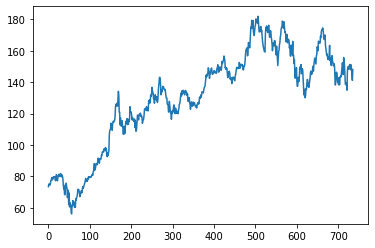

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,73.419998,72.379997,72.482498,73.412498,100805600.0
1,75.150002,73.797501,74.059998,75.087502,135480400.0
2,75.144997,74.125000,74.287498,74.357498,146322800.0
3,74.989998,73.187500,73.447502,74.949997,118387200.0
4,75.224998,74.370003,74.959999,74.597504,108872000.0
...,...,...,...,...,...
731,151.830002,149.339996,149.449997,151.070007,58301400.0
732,148.880005,147.119995,148.309998,148.110001,35195900.0
733,146.639999,143.380005,145.139999,144.220001,69246000.0
734,144.809998,140.350006,144.289993,141.169998,83763800.0


In [9]:
ma50 = df.Close.rolling(50).mean()
ma50

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
731    146.616999
732    146.531799
733    146.402199
734    146.135999
735    145.958599
Name: Close, Length: 736, dtype: float64

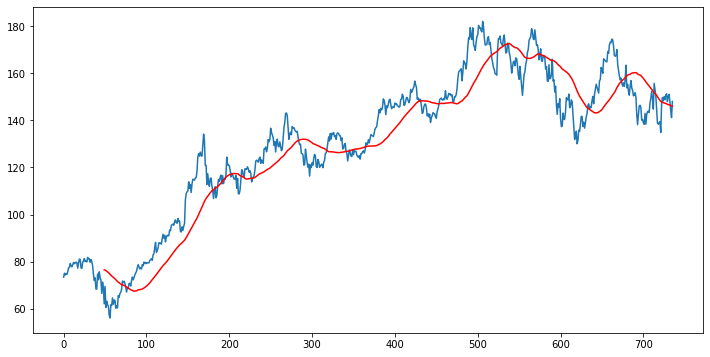

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50, 'r')

ma100 = df.Close.rolling(100).mean()
ma100

In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
731    152.907999
732    152.959899
733    152.938599
734    152.879899
735    152.911499
Name: Close, Length: 736, dtype: float64

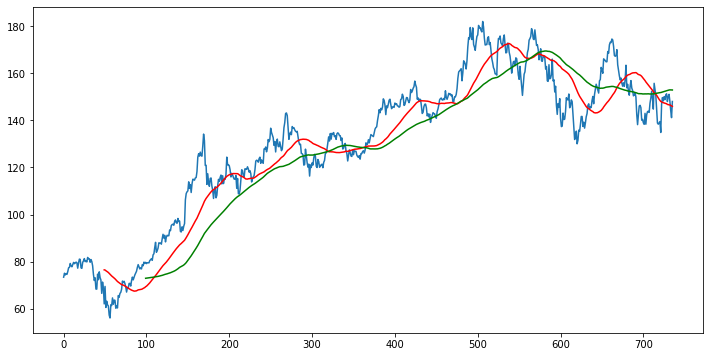

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50, 'r')
plt.plot(ma100, 'g')

In [13]:
df.shape

(736, 5)

In [14]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(515, 1)
(221, 1)


In [15]:
data_training.head()

,Close
0,73.412498
1,75.087502
2,74.357498
3,74.949997
4,74.597504


In [16]:
data_testing.head()

,Close
515,173.070007
516,169.800003
517,166.229996
518,164.509995
519,162.410004


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
dataTrainingArray = scaler.fit_transform(data_training)
dataTrainingArray

array([[0.13755038],
       [0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.121

In [19]:
dataTrainingArray.shape

(515, 1)

In [20]:
x_train = []
y_train = []

for i in range(50, dataTrainingArray.shape[0]):
    x_train.append(dataTrainingArray[i-50: i])
    y_train.append(dataTrainingArray[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(465, 50, 1)

In [22]:
# ML MODEL

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
15/15 [==============================] - 4s 61ms/step - loss: 0.0097
Epoch 2/50
15/15 [==============================] - 1s 60ms/step - loss: 0.0080
Epoch 3/50
15/15 [==============================] - 1s 65ms/step - loss: 0.0090
Epoch 4/50
15/15 [==============================] - 1s 62ms/step - loss: 0.0087
Epoch 5/50
15/15 [==============================] - 1s 58ms/step - loss: 0.0080
Epoch 6/50
15/15 [==============================] - 1s 64ms/step - loss: 0.0077
Epoch 7/50
15/15 [==============================] - 1s 60ms/step - loss: 0.0082
Epoch 8/50
15/15 [==============================] - 1s 59ms/step - loss: 0.0082
Epoch 9/50
15/15 [==============================] - 1s 58ms/step - loss: 0.0083
Epoch 10/50
15/15 [==============================] - 1s 58ms/step - loss: 0.0083
Epoch 11/50
15/15 [==============================] - 1s 59ms/step - loss: 0.0080
Epoch 12/50
15/15 [==============================] - 1s 60ms/step - loss: 0.0070
Epoch 13/50
15/15 [==================

In [28]:
model.save('keras_model.h5')

In [29]:
past_50_days = data_training.tail(50)

In [30]:
final_df = past_50_days.append(data_testing, ignore_index = True)

In [31]:
final_df.head()

,Close
0,151.490005
1,150.960007
2,151.279999
3,150.440002
4,150.809998


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.41251221],
       [0.40231011],
       [0.40846973],
       [0.39230041],
       [0.39942255],
       [0.34379214],
       [0.34282962],
       [0.38363829],
       [0.38383068],
       [0.40307996],
       [0.45101077],
       [0.53532241],
       [0.58691063],
       [0.59595782],
       [0.60346502],
       [0.61366712],
       [0.51491822],
       [0.5809434 ],
       [0.67834471],
       [0.66814261],
       [0.64870065],
       [0.61174207],
       [0.67872978],
       [0.79153027],
       [0.86660264],
       [0.85659293],
       [0.95072189],
       [0.87930723],
       [0.85216568],
       [0.94783462],
       [0.81231953],
       [0.79076043],
       [0.76400394],
       [0.82637171],
       [0.87738218],
       [0.88970171],
       [0.96766135],
       [0.94764194],
       [0.9493746 ],
       [0.92666029],
       [0.91453345],
       [1.        ],
       [0.95553421],
       [0.86352268],
       [0.80731482],
       [0.81058716],
       [0.81097223],
       [0.866

In [33]:
input_data.shape

(271, 1)

In [34]:
x_test = []
y_test = []

for i in range(50, input_data.shape[0]):
    x_test.append(input_data[i-50: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(221, 50, 1)
(221,)


In [35]:
# Making Predictions

In [36]:
y_predicted = model.predict(x_test)

In [37]:
y_predicted.shape

(221, 1)

In [38]:
y_test

array([0.82791169, 0.76496646, 0.6962464 , 0.66313761, 0.6227143 ,
       0.60750721, 0.5720886 , 0.57035624, 0.56130905, 0.77516856,
       0.86082779, 0.85755545, 0.88123198, 0.82463905, 0.81482203,
       0.80077014, 0.86179032, 0.88970171, 0.80962464, 0.74263723,
       0.74725716, 0.82252162, 0.81790198, 0.74725716, 0.71684327,
       0.6594805 , 0.57767106, 0.6290666 , 0.66968259, 0.67487968,
       0.6379211 , 0.70259869, 0.6962464 , 0.63734365, 0.56284903,
       0.52704536, 0.63310878, 0.54783462, 0.47487968, 0.39576514,
       0.48180944, 0.56843119, 0.58825793, 0.65293552, 0.67988469,
       0.74610225, 0.77285874, 0.84716097, 0.85967288, 0.87661234,
       0.94128993, 0.91838324, 0.85755545, 0.85178061, 0.93128023,
       0.86621757, 0.80404248, 0.81000971, 0.77054863, 0.68700682,
       0.72377302, 0.77651586, 0.67815203, 0.67391746, 0.71876802,
       0.71549568, 0.69990381, 0.61077955, 0.63176149, 0.51472583,
       0.51029858, 0.64639083, 0.53108754, 0.53705507, 0.56631

In [39]:
y_predicted

array([[0.8418038 ],
       [0.8303432 ],
       [0.8183876 ],
       [0.8050551 ],
       [0.78955096],
       [0.7713647 ],
       [0.75055444],
       [0.7275154 ],
       [0.7030521 ],
       [0.67812514],
       [0.6550004 ],
       [0.6364731 ],
       [0.62476903],
       [0.62111795],
       [0.625134  ],
       [0.63545   ],
       [0.6500884 ],
       [0.6677863 ],
       [0.6877539 ],
       [0.70813346],
       [0.7263005 ],
       [0.7403995 ],
       [0.75054383],
       [0.75741065],
       [0.7609334 ],
       [0.7608382 ],
       [0.75654006],
       [0.7472007 ],
       [0.7333676 ],
       [0.7166169 ],
       [0.69871724],
       [0.68084043],
       [0.66449666],
       [0.6507803 ],
       [0.63966346],
       [0.6299893 ],
       [0.6203738 ],
       [0.61092186],
       [0.60134834],
       [0.59099305],
       [0.5793136 ],
       [0.5666325 ],
       [0.5538366 ],
       [0.541981  ],
       [0.53223836],
       [0.52584195],
       [0.5241119 ],
       [0.527

In [40]:
scaler.scale_

array([0.01924928])

In [41]:
scale_factor = 1/0.01924928
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

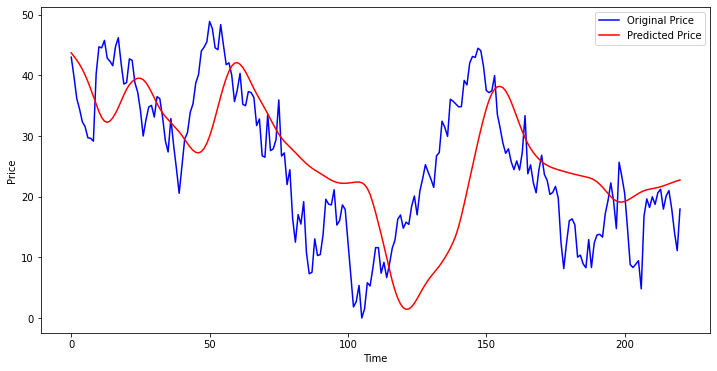

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()